<a href="https://colab.research.google.com/github/stepthom/869_course/blob/main/2026%20869%20Project%20Template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MMAI 869 Project: Example Notebook

*Updated May 1, 2025*

This notebook serves as a template for the Team Project. Teams can use this notebook as a starting point, and update it successively with new ideas and techniques to improve their model results.

Note that is not required to use this template. Teams may also alter this template in any way they see fit.

# Preliminaries: Inspect and Set up environment

No action is required on your part in this section. These cells print out helpful information about the environment, just in case.

In [1]:
# 🧰 General-purpose libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import joblib


# 🧪 Scikit-learn preprocessing & pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif

# 🔍 Scikit-learn model selection
from sklearn.model_selection import (
    train_test_split,
    cross_val_score,
    cross_validate,
    GridSearchCV,
    StratifiedKFold
)

# 🧠 Scikit-learn classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    RandomForestClassifier,
    GradientBoostingClassifier,
    AdaBoostClassifier,
    ExtraTreesClassifier
)
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# 🚀 Gradient boosting frameworks
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# 📊 Evaluation
from sklearn.metrics import accuracy_score, classification_report

# 🧪 Sample dataset (for testing/demo)
from sklearn.datasets import make_classification

import warnings
warnings.filterwarnings('ignore', category=UserWarning)


In [2]:
!python --version

Python 3.10.16


# 0: Data Loading and Inspection

In [3]:
# Load dataset for the project
df_train = pd.read_csv("data_yun/X_train_cat_MostFrequent_encoded.csv")
df_test = pd.read_csv("data_yun/X_test_cat_MostFrequent_encoded.csv")

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 37 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   HomePlanet_Earth           8693 non-null   float64
 1   HomePlanet_Europa          8693 non-null   float64
 2   HomePlanet_Mars            8693 non-null   float64
 3   Destination_55 Cancri e    8693 non-null   float64
 4   Destination_PSO J318.5-22  8693 non-null   float64
 5   Destination_TRAPPIST-1e    8693 non-null   float64
 6   VIP_False                  8693 non-null   float64
 7   VIP_True                   8693 non-null   float64
 8   CryoSleep_False            8693 non-null   float64
 9   CryoSleep_True             8693 non-null   float64
 10  Cabin_Prefix_A             8693 non-null   float64
 11  Cabin_Prefix_B             8693 non-null   float64
 12  Cabin_Prefix_C             8693 non-null   float64
 13  Cabin_Prefix_D             8693 non-null   float

In [5]:
# Let's print some descriptive statistics for all the numeric features.
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
HomePlanet_Earth,8693.0,0.552514,0.497263,0.0,0.0,1.0,1.0,1.0
HomePlanet_Europa,8693.0,0.245140,0.430195,0.0,0.0,0.0,0.0,1.0
HomePlanet_Mars,8693.0,0.202347,0.401772,0.0,0.0,0.0,0.0,1.0
Destination_55 Cancri e,8693.0,0.207063,0.405224,0.0,0.0,0.0,0.0,1.0
Destination_PSO J318.5-22,8693.0,0.091568,0.288432,0.0,0.0,0.0,0.0,1.0
Destination_TRAPPIST-1e,8693.0,0.701369,0.457684,0.0,0.0,1.0,1.0,1.0
VIP_False,8693.0,0.977108,0.149568,0.0,1.0,1.0,1.0,1.0
VIP_True,8693.0,0.022892,0.149568,0.0,0.0,0.0,0.0,1.0
CryoSleep_False,8693.0,0.650638,0.476796,0.0,0.0,1.0,1.0,1.0
CryoSleep_True,8693.0,0.349362,0.476796,0.0,0.0,0.0,1.0,1.0


In [7]:
# How much missing data is in each feature?
df_train.isna().sum()

HomePlanet_Earth             0
HomePlanet_Europa            0
HomePlanet_Mars              0
Destination_55 Cancri e      0
Destination_PSO J318.5-22    0
Destination_TRAPPIST-1e      0
VIP_False                    0
VIP_True                     0
CryoSleep_False              0
CryoSleep_True               0
Cabin_Prefix_A               0
Cabin_Prefix_B               0
Cabin_Prefix_C               0
Cabin_Prefix_D               0
Cabin_Prefix_E               0
Cabin_Prefix_F               0
Cabin_Prefix_G               0
Cabin_Prefix_T               0
Cabin_Prefix_nan             0
GroupSize_1                  0
GroupSize_2                  0
GroupSize_3                  0
GroupSize_4                  0
GroupSize_5                  0
GroupSize_6                  0
GroupSize_7                  0
GroupSize_8                  0
Age                          0
RoomService                  0
FoodCourt                    0
ShoppingMall                 0
Spa                          0
VRDeck  

In [11]:
# Scikit-learn needs us to put the features in one dataframe, and the label in another.
# It's tradition to name these variables X and y, but it doesn't really matter.

X_train = df_train.drop(['Transported'], axis=1)
y_train = df_train['Transported']

## 1.2: Model creation, hyperparameter tuning, and validation

### STEP 1: Baseline Model Experimentation
Evaluate both Tree-based and non-Tree ML models using K-fold CV to compare F1-macro, weighted F1, and accuracy scores. No feature engineering is applied. This serves as a baseline using raw numeric data for leaderboard benchmarking.

In [13]:
%%time

# Define short descriptions
model_descriptions = {
    "Decision Tree": "A simple, interpretable tree that splits data based on feature thresholds.",
    "Random Forest": "An ensemble of decision trees that improves generalization via bagging.",
    "Gradient Boosting": "A sequential ensemble where each tree corrects errors from the last.",
    "AdaBoost": "A boosting method that emphasizes misclassified examples during training.",
    "Logistic Regression": "A linear model that predicts probabilities for classification tasks.",
    "SVM": "A margin-based classifier that finds the optimal boundary between classes using support vectors.",
    "XGBoost": "A scalable, regularized boosting method with tree-based learners.",
    "LightGBM": "A fast, efficient gradient boosting method based on histogram-based learning.",
    "CatBoost": "A gradient boosting library with native support for categorical features."
}

# Define model types
model_types = {
    "Decision Tree": "Tree-Based",
    "Random Forest": "Tree-Based",
    "Gradient Boosting": "Tree-Based",
    "AdaBoost": "Tree-Based",
    "XGBoost": "Tree-Based",
    "CatBoost": "Tree-Based",
    "Logistic Regression": "Non-Tree",
    "SVM": "Non-Tree"
}

# Define models
models = {
    "Decision Tree": DecisionTreeClassifier(max_depth=3, random_state=0),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=0),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=0),
    "AdaBoost": AdaBoostClassifier(n_estimators=100, random_state=0),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=0),
    "SVM": SVC(kernel="rbf", C=1.0, probability=True, random_state=0),
    "XGBoost": XGBClassifier(eval_metric='logloss', random_state=0),
    "CatBoost": CatBoostClassifier(verbose=0, random_state=0)
}

separator = "-" * 60
results = {}

print("\n📊 Starting model evaluation with 5-fold cross-validation\n")

for name, model in models.items():
    print(separator)
    print(f"🔍 Model: {name}")
    print(f"🧠 Description: {model_descriptions.get(name, 'N/A')}")
    print(f"⚙️  Params: {model.get_params()}")

    cv_result = cross_validate(
        model, X_train, y_train,
        cv=5,
        scoring=["f1_macro", "f1_weighted", "accuracy"],
        return_train_score=True,
        n_jobs=-1
    )

    results[name] = {
        "Model Type": model_types[name],
        "Train F1 (Macro)": np.mean(cv_result["train_f1_macro"]),
        "CV F1 (Macro)": np.mean(cv_result["test_f1_macro"]),
        "CV F1 (Weighted)": np.mean(cv_result["test_f1_weighted"]),
        "CV Accuracy": np.mean(cv_result["test_accuracy"])
    }

    print(f"✅ Train F1 (Macro): {results[name]['Train F1 (Macro)']:.2f}")
    print(f"✅ CV F1 (Macro): {results[name]['CV F1 (Macro)']:.2f}")
    print(f"✅ CV F1 (Weighted): {results[name]['CV F1 (Weighted)']:.2f}")
    print(f"✅ CV Accuracy: {results[name]['CV Accuracy']:.2f}")

# Final summary
print("\n✅ All models evaluated. Summary below:\n")

summary_df = pd.DataFrame(results).T.sort_values("CV Accuracy", ascending=False)
display(summary_df)



📊 Starting model evaluation with 5-fold cross-validation

------------------------------------------------------------
🔍 Model: Decision Tree
🧠 Description: A simple, interpretable tree that splits data based on feature thresholds.
⚙️  Params: {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 0, 'splitter': 'best'}
✅ Train F1 (Macro): 0.77
✅ CV F1 (Macro): 0.76
✅ CV F1 (Weighted): 0.76
✅ CV Accuracy: 0.76
------------------------------------------------------------
🔍 Model: Random Forest
🧠 Description: An ensemble of decision trees that improves generalization via bagging.
⚙️  Params: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_d

/Users/deenuy/Documents/Workspace/Pet-projects/python_repos/queensu-workspace/869_course/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/deenuy/Documents/Workspace/Pet-projects/python_repos/queensu-workspace/869_course/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Pl

✅ Train F1 (Macro): 0.79
✅ CV F1 (Macro): 0.79
✅ CV F1 (Weighted): 0.79
✅ CV Accuracy: 0.79
------------------------------------------------------------
🔍 Model: SVM
🧠 Description: A margin-based classifier that finds the optimal boundary between classes using support vectors.
⚙️  Params: {'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': True, 'random_state': 0, 'shrinking': True, 'tol': 0.001, 'verbose': False}
✅ Train F1 (Macro): 0.79
✅ CV F1 (Macro): 0.78
✅ CV F1 (Weighted): 0.78
✅ CV Accuracy: 0.79
------------------------------------------------------------
🔍 Model: XGBoost
🧠 Description: A scalable, regularized boosting method with tree-based learners.
⚙️  Params: {'objective': 'binary:logistic', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'de

,Model Type,Train F1 (Macro),CV F1 (Macro),CV F1 (Weighted),CV Accuracy
CatBoost,Tree-Based,0.863479,0.805607,0.805647,0.805938
Gradient Boosting,Tree-Based,0.817763,0.795091,0.795159,0.7957
XGBoost,Tree-Based,0.91205,0.795171,0.795204,0.79547
Logistic Regression,Non-Tree,0.789921,0.78649,0.786522,0.786725
SVM,Non-Tree,0.78782,0.784483,0.784634,0.786613
Random Forest,Tree-Based,0.956515,0.784431,0.784411,0.784655
AdaBoost,Tree-Based,0.787424,0.779496,0.779564,0.780055
Decision Tree,Tree-Based,0.76793,0.757415,0.757542,0.75935


CPU times: user 68 ms, sys: 57.6 ms, total: 126 ms
Wall time: 11.3 s


### STEP 2: Hyperparameter Tuning of XGBoost for Accuracy Optimization
This step fine-tunes the XGBoost model using GridSearchCV with 5-fold cross-validation, targeting improved accuracy aligned with leaderboard evaluation. The objective is to identify the best-performing configuration for deployment while maintaining generalizability and avoiding overfitting.

Hyperparameter Tuning of XGBoost, includes feature engineering integrated into a pipeline using ColumnTransformer. This version includes:
- Imputation and scaling for numeric features
- Imputation and one-hot encoding for categorical features
- Modular pipeline with XGBoost
- Grid search over relevant hyperparameters
- Accuracy as the scoring metric

In [19]:
%%time

# Pipeline with preprocessing + model
full_pipeline = Pipeline([
    # ('preprocessing', preprocessor),
    ('clf', XGBClassifier(eval_metric='logloss', random_state=42))
])

# Hyperparameter search space for XGBoost
param_grid = {
    'clf__n_estimators': [100, 200],
    'clf__max_depth': [4, 5, 6, 7, 11, 15, 21],
    'clf__learning_rate': [0.01, 0.02, 0.03, 0.05, 0.1],
    'clf__subsample': [0.7, 0.8, 0.9, 1.0],
    'clf__colsample_bytree': [0.7, 1.0]
}

# Run hyperparameter optimization using GridSearchCV
grid_search = GridSearchCV(
    estimator=full_pipeline,
    param_grid=param_grid,
    scoring='accuracy',        # Main leaderboard metric
    cv=5,                      # 5-fold cross-validation
    n_jobs=-1,                 # Parallel execution
    verbose=1,                 # Print progress
    return_train_score=True    # Track training performance
)

# Fit the pipeline to training data
start_time = datetime.now()
grid_search.fit(X_train, y_train)
end_time = datetime.now()

# Print best result and CV performance
print("🎯 Best Hyperparameters:")
print(grid_search.best_params_)
print(f"\n✅ Best CV Accuracy: {grid_search.best_score_:.4f}")

# Extract all grid search results for tracking
cv_results = grid_search.cv_results_
results_list = []

for i in range(len(cv_results['params'])):
    # Extract hyperparameters
    params = cv_results['params'][i]
    clean_params = {k.replace('clf__', ''): v for k, v in params.items()}

    # Get CV scores for each fold
    cv_scores = []
    for fold in range(5):
        cv_scores.append(cv_results[f'split{fold}_test_score'][i])

    # Create result record
    result = {
        'Model': 'XGBoost',
        'Hyperparameters': str(clean_params),
        'CV_Accuracy_Mean': cv_results['mean_test_score'][i],
        'CV_Accuracy_Std': cv_results['std_test_score'][i],
        'CV_Accuracy_Min': min(cv_scores),
        'CV_Accuracy_Max': max(cv_scores),
        'Rank': cv_results['rank_test_score'][i],
        'Is_Best': i == grid_search.best_index_,
        'Runtime_Seconds': (end_time - start_time).total_seconds()
    }

    # Add individual hyperparameters as separate columns
    for param_name, param_value in clean_params.items():
        result[f'{param_name}'] = param_value

    results_list.append(result)

# Create results DataFrame
results_df = pd.DataFrame(results_list)

# Display top 10 configurations
print("\n📊 TOP 10 CONFIGURATIONS:")
top_configs = results_df.nlargest(10, 'CV_Accuracy_Mean')[
    ['Model', 'CV_Accuracy_Mean', 'CV_Accuracy_Std', 'Hyperparameters', 'Rank']
]
print(top_configs.to_string(index=False))

# Show accuracy range
print(f"\n📈 PERFORMANCE SUMMARY:")
print(f"Total experiments: {len(results_df)}")
print(f"Best CV Accuracy: {results_df['CV_Accuracy_Mean'].max():.4f}")
print(f"Worst CV Accuracy: {results_df['CV_Accuracy_Mean'].min():.4f}")
print(f"Accuracy Range: {results_df['CV_Accuracy_Mean'].max() - results_df['CV_Accuracy_Mean'].min():.4f}")
print(f"Total Runtime: {(end_time - start_time).total_seconds():.2f} seconds")

# Save results to CSV
results_df.to_csv('grid_search_results.csv', index=False)
print(f"\n💾 Results saved to: grid_search_results.csv")

# Extract best model for reuse or export
best_model = grid_search.best_estimator_

# Save best model
joblib.dump(best_model, 'best_xgb_model.pkl')
print("✅ Best model saved to: best_xgb_model.pkl")

# Display detailed results table
print(f"\n📋 DETAILED RESULTS TABLE:")
display_cols = ['Model', 'CV_Accuracy_Mean', 'CV_Accuracy_Std', 'n_estimators', 'max_depth', 'learning_rate', 'subsample', 'colsample_bytree', 'Rank']
print(results_df[display_cols].round(4).to_string(index=False))

Fitting 5 folds for each of 560 candidates, totalling 2800 fits
🎯 Best Hyperparameters:
{'clf__colsample_bytree': 1.0, 'clf__learning_rate': 0.05, 'clf__max_depth': 6, 'clf__n_estimators': 200, 'clf__subsample': 0.9}

✅ Best CV Accuracy: 0.8043

📊 TOP 10 CONFIGURATIONS:
  Model  CV_Accuracy_Mean  CV_Accuracy_Std                                                                                         Hyperparameters  Rank
XGBoost          0.804327         0.007780 {'colsample_bytree': 1.0, 'learning_rate': 0.05, 'max_depth': 6, 'n_estimators': 200, 'subsample': 0.9}     1
XGBoost          0.803523         0.009678 {'colsample_bytree': 1.0, 'learning_rate': 0.03, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}     2
XGBoost          0.803523         0.009932  {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100, 'subsample': 1.0}     3
XGBoost          0.803292         0.008000 {'colsample_bytree': 0.7, 'learning_rate': 0.03, 'max_depth': 7, 'n_estima

### STEP 3: Hyperparameter Tuning of RandomForest for Accuracy Optimization
This step fine-tunes the RandomForest model using GridSearchCV with 5-fold cross-validation, targeting improved accuracy aligned with leaderboard evaluation. The objective is to identify the best-performing configuration for deployment while maintaining generalizability and avoiding overfitting.

Hyperparameter Tuning of RandomForest includes feature engineering integrated into a pipeline using ColumnTransformer. This version includes:
- Imputation and scaling for numeric features
- Imputation and one-hot encoding for categorical features
- Modular pipeline with RandomForestClassifier
- Grid search over relevant hyperparameters optimized for mixed data types
- Accuracy as the scoring metric
- Bootstrap and class weighting strategies for handling potential imbalanced spaceship passenger data
- Tree-specific parameters (depth, split criteria, leaf constraints) tailored for categorical feature handling

1620 candidates represents all possible hyperparameter combinations being tested, and with 5-fold cross-validation, each combination is evaluated 5 times on different data splits, resulting in 8100 total model training runs to find the optimal RandomForest configuration.

In [15]:
%%time

# Pipeline with preprocessing + model
full_pipeline = Pipeline([
    # ('preprocessing', preprocessor),
    ('clf', RandomForestClassifier(random_state=42))
])

# Research-based hyperparameter search space for RandomForest (optimized for mixed data types)
param_grid = {
    'clf__n_estimators': [100, 120, 150],                   # Number of trees - more trees generally better
    'clf__max_depth': [None, 25, 30],                       # Tree depth - None allows full growth
    'clf__min_samples_split': [2, 3, 4],                    # Minimum samples to split internal node
    'clf__min_samples_leaf': [1, 2],                        # Minimum samples at leaf node
    'clf__max_features': ['sqrt', 'log2'],                  # Features to consider at each split
    'clf__bootstrap': [True],                               # Whether to use bootstrap samples
    'clf__class_weight': [None, 'balanced']                 # Handle potential class imbalance
}

# Run hyperparameter optimization using GridSearchCV
grid_search = GridSearchCV(
    estimator=full_pipeline,
    param_grid=param_grid,
    scoring='accuracy',        # Main leaderboard metric
    cv=5,                      # 5-fold cross-validation
    n_jobs=-1,                 # Parallel execution
    verbose=1,                 # Print progress
    return_train_score=True    # Track training performance
)

# Fit the pipeline to training data
start_time = datetime.now()
grid_search.fit(X_train, y_train)
end_time = datetime.now()

# Print best result and CV performance
print("🎯 Best Hyperparameters:")
print(grid_search.best_params_)
print(f"\n✅ Best CV Accuracy: {grid_search.best_score_:.4f}")

# Extract all grid search results for tracking
cv_results = grid_search.cv_results_
results_list = []

for i in range(len(cv_results['params'])):
    # Extract hyperparameters
    params = cv_results['params'][i]
    clean_params = {k.replace('clf__', ''): v for k, v in params.items()}

    # Get CV scores for each fold
    cv_scores = []
    for fold in range(5):
        cv_scores.append(cv_results[f'split{fold}_test_score'][i])

    # Create result record
    result = {
        'Model': 'RandomForest',
        'Hyperparameters': str(clean_params),
        'CV_Accuracy_Mean': cv_results['mean_test_score'][i],
        'CV_Accuracy_Std': cv_results['std_test_score'][i],
        'CV_Accuracy_Min': min(cv_scores),
        'CV_Accuracy_Max': max(cv_scores),
        'Rank': cv_results['rank_test_score'][i],
        'Is_Best': i == grid_search.best_index_,
        'Runtime_Seconds': (end_time - start_time).total_seconds()
    }

    # Add individual hyperparameters as separate columns
    for param_name, param_value in clean_params.items():
        result[f'{param_name}'] = param_value

    results_list.append(result)

# Create results DataFrame
results_df = pd.DataFrame(results_list)

# Display top 10 configurations
print("\n📊 TOP 10 CONFIGURATIONS:")
top_configs = results_df.nlargest(10, 'CV_Accuracy_Mean')[
    ['Model', 'CV_Accuracy_Mean', 'CV_Accuracy_Std', 'Hyperparameters', 'Rank']
]
print(top_configs.to_string(index=False))

# Show accuracy range
print(f"\n📈 PERFORMANCE SUMMARY:")
print(f"Total experiments: {len(results_df)}")
print(f"Best CV Accuracy: {results_df['CV_Accuracy_Mean'].max():.4f}")
print(f"Worst CV Accuracy: {results_df['CV_Accuracy_Mean'].min():.4f}")
print(f"Accuracy Range: {results_df['CV_Accuracy_Mean'].max() - results_df['CV_Accuracy_Mean'].min():.4f}")
print(f"Total Runtime: {(end_time - start_time).total_seconds():.2f} seconds")

# Save results to CSV
results_df.to_csv('grid_search_results.csv', index=False)
print(f"\n💾 Results saved to: grid_search_results.csv")

# Extract best model for reuse or export
best_model = grid_search.best_estimator_

# Save best model
joblib.dump(best_model, 'best_randomforest_model.pkl')
print("✅ Best model saved to: best_randomforest_model.pkl")

# Display detailed results table
print(f"\n📋 DETAILED RESULTS TABLE:")
display_cols = ['Model', 'CV_Accuracy_Mean', 'CV_Accuracy_Std', 'n_estimators', 'max_depth', 'min_samples_split', 'min_samples_leaf', 'max_features', 'bootstrap', 'class_weight', 'Rank']
print(results_df[display_cols].round(4).to_string(index=False))

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
🎯 Best Hyperparameters:
{'clf__bootstrap': True, 'clf__class_weight': None, 'clf__max_depth': 30, 'clf__max_features': 'log2', 'clf__min_samples_leaf': 2, 'clf__min_samples_split': 2, 'clf__n_estimators': 150}

✅ Best CV Accuracy: 0.7954

📊 TOP 10 CONFIGURATIONS:
       Model  CV_Accuracy_Mean  CV_Accuracy_Std                                                                                                                                                Hyperparameters  Rank
RandomForest          0.795354         0.008790         {'bootstrap': True, 'class_weight': None, 'max_depth': 30, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 150}     1
RandomForest          0.795354         0.008790         {'bootstrap': True, 'class_weight': None, 'max_depth': 30, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 150}     1
RandomForest          0.795354   

### STEP 4: Hyperparameter Tuning of LogisticRegression for Accuracy Optimization
This step fine-tunes the LogisticRegression model using GridSearchCV with 5-fold cross-validation, targeting improved accuracy aligned with leaderboard evaluation. The objective is to identify the best-performing configuration for deployment while maintaining generalizability and avoiding overfitting.

Hyperparameter Tuning of LogisticRegression includes feature engineering integrated into a pipeline using ColumnTransformer. This version includes:
- Imputation and scaling for numeric features
- Imputation and one-hot encoding for categorical features
- Modular pipeline with LogisticRegression
- Grid search over relevant hyperparameters optimized for high-dimensional encoded data
- Accuracy as the scoring metric
- Regularization strategies (L1, L2, ElasticNet) for feature selection and overfitting prevention
- Class weighting for handling potential imbalanced spaceship passenger data
- Solver optimization for convergence with mixed categorical/numerical features

240 candidates represents all possible hyperparameter combinations being tested, and with 5-fold cross-validation, each combination is evaluated 5 times on different data splits, resulting in 1200 total model training runs to find the optimal LogisticRegression configuration.

In [16]:
%%time
from datetime import datetime

# Pipeline with preprocessing + model
full_pipeline = Pipeline([
    # ('preprocessing', preprocessor),
    ('clf', LogisticRegression(random_state=42, max_iter=2000))
])

# Research-based hyperparameter search space for LogisticRegression (optimized for mixed data types)
param_grid = {
    'clf__C': [0.5, 1.0, 2.0, 5.0],                        # Regularization strength (inverse)
    'clf__penalty': ['l2'],                                 # Regularization type
    'clf__solver': ['lbfgs'],                               # Optimization algorithm
    'clf__class_weight': [None, 'balanced'],                # Handle potential class imbalance
    'clf__fit_intercept': [True],                           # Whether to fit intercept term
    'clf__max_iter': [2000]                                 # Maximum iterations for convergence
}

# Run hyperparameter optimization using GridSearchCV
grid_search = GridSearchCV(
    estimator=full_pipeline,
    param_grid=param_grid,
    scoring='accuracy',        # Main leaderboard metric
    cv=5,                      # 5-fold cross-validation
    n_jobs=-1,                 # Parallel execution
    verbose=1,                 # Print progress
    return_train_score=True    # Track training performance
)

# Fit the pipeline to training data
start_time = datetime.now()
grid_search.fit(X_train, y_train)
end_time = datetime.now()

# Print best result and CV performance
print("🎯 Best Hyperparameters:")
print(grid_search.best_params_)
print(f"\n✅ Best CV Accuracy: {grid_search.best_score_:.4f}")

# Extract all grid search results for tracking
cv_results = grid_search.cv_results_
results_list = []

for i in range(len(cv_results['params'])):
    # Extract hyperparameters
    params = cv_results['params'][i]
    clean_params = {k.replace('clf__', ''): v for k, v in params.items()}

    # Get CV scores for each fold
    cv_scores = []
    for fold in range(5):
        cv_scores.append(cv_results[f'split{fold}_test_score'][i])

    # Create result record
    result = {
        'Model': 'LogisticRegression',
        'Hyperparameters': str(clean_params),
        'CV_Accuracy_Mean': cv_results['mean_test_score'][i],
        'CV_Accuracy_Std': cv_results['std_test_score'][i],
        'CV_Accuracy_Min': min(cv_scores),
        'CV_Accuracy_Max': max(cv_scores),
        'Rank': cv_results['rank_test_score'][i],
        'Is_Best': i == grid_search.best_index_,
        'Runtime_Seconds': (end_time - start_time).total_seconds()
    }

    # Add individual hyperparameters as separate columns
    for param_name, param_value in clean_params.items():
        result[param_name] = param_value

    results_list.append(result)

# Create results DataFrame
results_df = pd.DataFrame(results_list)

# Display top 10 configurations
print("\n📊 TOP 10 CONFIGURATIONS:")
top_configs = results_df.nlargest(10, 'CV_Accuracy_Mean')[
    ['Model', 'CV_Accuracy_Mean', 'CV_Accuracy_Std', 'Hyperparameters', 'Rank']
]
print(top_configs.to_string(index=False))

# Show accuracy range
print(f"\n📈 PERFORMANCE SUMMARY:")
print(f"Total experiments: {len(results_df)}")
print(f"Best CV Accuracy: {results_df['CV_Accuracy_Mean'].max():.4f}")
print(f"Worst CV Accuracy: {results_df['CV_Accuracy_Mean'].min():.4f}")
print(f"Accuracy Range: {results_df['CV_Accuracy_Mean'].max() - results_df['CV_Accuracy_Mean'].min():.4f}")
print(f"Total Runtime: {(end_time - start_time).total_seconds():.2f} seconds")

# Save results to CSV
results_df.to_csv('logistic_regression_grid_search_results.csv', index=False)
print(f"\n💾 Results saved to: logistic_regression_grid_search_results.csv")

# Extract best model for reuse or export
best_model = grid_search.best_estimator_

# Save best model
joblib.dump(best_model, 'best_logisticregression_model.pkl')
print("✅ Best model saved to: best_logisticregression_model.pkl")

# Display detailed results table
print(f"\n📋 DETAILED RESULTS TABLE:")
display_cols = ['Model', 'CV_Accuracy_Mean', 'CV_Accuracy_Std', 'C', 'penalty', 'solver', 'class_weight', 'fit_intercept', 'max_iter', 'Rank']
available_cols = [col for col in display_cols if col in results_df.columns]
print(results_df[available_cols].round(4).to_string(index=False))

Fitting 5 folds for each of 8 candidates, totalling 40 fits


/Users/deenuy/Documents/Workspace/Pet-projects/python_repos/queensu-workspace/869_course/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/deenuy/Documents/Workspace/Pet-projects/python_repos/queensu-workspace/869_course/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Pl

🎯 Best Hyperparameters:
{'clf__C': 1.0, 'clf__class_weight': 'balanced', 'clf__fit_intercept': True, 'clf__max_iter': 2000, 'clf__penalty': 'l2', 'clf__solver': 'lbfgs'}

✅ Best CV Accuracy: 0.7878

📊 TOP 10 CONFIGURATIONS:
             Model  CV_Accuracy_Mean  CV_Accuracy_Std                                                                                                     Hyperparameters  Rank
LogisticRegression          0.787760         0.005721 {'C': 1.0, 'class_weight': 'balanced', 'fit_intercept': True, 'max_iter': 2000, 'penalty': 'l2', 'solver': 'lbfgs'}     1
LogisticRegression          0.787760         0.005439       {'C': 5.0, 'class_weight': None, 'fit_intercept': True, 'max_iter': 2000, 'penalty': 'l2', 'solver': 'lbfgs'}     2
LogisticRegression          0.787645         0.005521 {'C': 2.0, 'class_weight': 'balanced', 'fit_intercept': True, 'max_iter': 2000, 'penalty': 'l2', 'solver': 'lbfgs'}     3
LogisticRegression          0.787300         0.005401       {'C': 0.5, '

### STEP 5: Grid Search for model selection among XGBoost, RandomForest, and LogisticRegression

In [17]:
%%time

# =============================================================================
# DEFINE YOUR BEST MODELS (Replace with your actual best hyperparameters)
# =============================================================================
print("\n🎯 Configuring Best Models from Previous Grid Searches")
print("-" * 50)

# 🎯 Best Hyperparameters: {'clf__colsample_bytree': 0.7, 'clf__learning_rate': 0.1, 'clf__max_depth': 7, 'clf__n_estimators': 100, 'clf__subsample': 0.9}
best_models = {
    'XGBoost_Best': XGBClassifier(
        n_estimators=100,           # Your best value
        max_depth=7,                # Your best value
        learning_rate=0.1,          # Your best value
        subsample=0.9,              # Your best value
        colsample_bytree=0.7,       # Your best value
        eval_metric='logloss',
        random_state=42
    ),

    'RandomForest_Best': RandomForestClassifier(
        n_estimators=100,           # Your best value (not 300)
        max_depth=None,             # Your best value (unlimited depth)
        min_samples_split=4,        # Your best value (not 2)
        min_samples_leaf=1,         # Your best value
        max_features='sqrt',        # Your best value
        bootstrap=True,             # Your best value
        class_weight='balanced',    # Your best value (not None)
        random_state=42
    ),

    'LogisticRegression_Best': LogisticRegression(
        C=0.5,                      # Your best value (not 1.0)
        penalty='l2',               # Your best value
        solver='lbfgs',             # Your best value (not liblinear)
        class_weight=None,          # Your best value
        fit_intercept=True,         # Your best value
        max_iter=2000,              # Your best value (not 1000)
        random_state=42
    )
}

print("✅ Best models configured from previous grid search results")

# =============================================================================
# COMPREHENSIVE COMPARISON OF BEST MODELS
# =============================================================================
print("\n🔍 Comprehensive Evaluation of Best Models")
print("=" * 60)

results = []

for model_name, model in best_models.items():
    print(f"\n🚀 Evaluating: {model_name}")
    print("-" * 30)

    # Create pipeline
    pipeline = Pipeline([
        # ('preprocessing', preprocessor),
        ('clf', model)
    ])

    # Perform comprehensive cross-validation
    start_time = datetime.now()

    cv_results = cross_validate(
        pipeline,
        X_train,
        y_train,
        cv=5,
        scoring=['accuracy', 'f1', 'f1_macro', 'roc_auc', 'precision', 'recall'],
        return_train_score=True,
        n_jobs=-1
    )

    end_time = datetime.now()
    runtime = (end_time - start_time).total_seconds()

    # Calculate comprehensive metrics
    result = {
        'Model_Name': model_name,
        'CV_Accuracy': cv_results['test_accuracy'].mean(),
        'CV_Accuracy_Std': cv_results['test_accuracy'].std(),
        'Train_Accuracy': cv_results['train_accuracy'].mean(),
        'CV_F1': cv_results['test_f1'].mean(),
        'CV_F1_Std': cv_results['test_f1'].std(),
        'CV_F1_Macro': cv_results['test_f1_macro'].mean(),
        'CV_Precision': cv_results['test_precision'].mean(),
        'CV_Recall': cv_results['test_recall'].mean(),
        'CV_AUC': cv_results['test_roc_auc'].mean(),
        'CV_AUC_Std': cv_results['test_roc_auc'].std(),
        'Runtime_Seconds': runtime,
        'Overfitting_Gap': cv_results['train_accuracy'].mean() - cv_results['test_accuracy'].mean()
    }

    results.append(result)

    # Print results
    print(f"✅ Results for {model_name}:")
    print(f"   CV Accuracy:  {result['CV_Accuracy']:.4f} (±{result['CV_Accuracy_Std']:.4f})")
    print(f"   CV F1:        {result['CV_F1']:.4f} (±{result['CV_F1_Std']:.4f})")
    print(f"   CV AUC:       {result['CV_AUC']:.4f} (±{result['CV_AUC_Std']:.4f})")
    print(f"   CV Precision: {result['CV_Precision']:.4f}")
    print(f"   CV Recall:    {result['CV_Recall']:.4f}")
    print(f"   Runtime:      {runtime:.2f} seconds")
    print(f"   Overfitting:  {result['Overfitting_Gap']:.4f}")

# =============================================================================
# FINAL ANALYSIS AND SELECTION
# =============================================================================
print("\n" + "=" * 60)
print("📊 FINAL ANALYSIS AND MODEL SELECTION")
print("=" * 60)

# Create results DataFrame
results_df = pd.DataFrame(results)

# Identify the ultimate winner
best_idx = results_df['CV_Accuracy'].idxmax()
best_model_result = results_df.loc[best_idx]

print(f"🏆 ULTIMATE WINNER: {best_model_result['Model_Name']}")
print(f"   CV Accuracy: {best_model_result['CV_Accuracy']:.4f} (±{best_model_result['CV_Accuracy_Std']:.4f})")
print(f"   CV F1:       {best_model_result['CV_F1']:.4f}")
print(f"   CV AUC:      {best_model_result['CV_AUC']:.4f}")
print(f"   Runtime:     {best_model_result['Runtime_Seconds']:.2f} seconds")

# Comprehensive comparison table
print(f"\n📋 COMPREHENSIVE COMPARISON TABLE:")
display_cols = ['Model_Name', 'CV_Accuracy', 'CV_F1', 'CV_AUC', 'CV_Precision', 'CV_Recall', 'Runtime_Seconds', 'Overfitting_Gap']
comparison_df = results_df[display_cols].round(4).sort_values('CV_Accuracy', ascending=False)
print(comparison_df.to_string(index=False))

# Performance rankings
print(f"\n🏅 PERFORMANCE RANKINGS:")
rankings = {
    'By Accuracy': results_df.sort_values('CV_Accuracy', ascending=False)['Model_Name'].tolist(),
    'By F1 Score': results_df.sort_values('CV_F1', ascending=False)['Model_Name'].tolist(),
    'By AUC': results_df.sort_values('CV_AUC', ascending=False)['Model_Name'].tolist(),
    'By Speed': results_df.sort_values('Runtime_Seconds', ascending=True)['Model_Name'].tolist(),
    'By Stability': results_df.sort_values('Overfitting_Gap', ascending=True)['Model_Name'].tolist()
}

for metric, ranking in rankings.items():
    print(f"   {metric:<15}: {' > '.join(ranking)}")

# Statistical significance analysis
print(f"\n📈 STATISTICAL SIGNIFICANCE ANALYSIS:")
accuracy_std = results_df['CV_Accuracy_Std']
best_accuracy = results_df['CV_Accuracy'].max()
second_best_accuracy = results_df['CV_Accuracy'].nlargest(2).iloc[1]
accuracy_diff = best_accuracy - second_best_accuracy

print(f"   Best accuracy: {best_accuracy:.4f}")
print(f"   2nd best:      {second_best_accuracy:.4f}")
print(f"   Difference:    {accuracy_diff:.4f}")
print(f"   Significant:   {'Yes' if accuracy_diff > 0.01 else 'Marginal' if accuracy_diff > 0.005 else 'No'}")

# =============================================================================
# SAVE FINAL RESULTS AND BEST MODEL
# =============================================================================
print(f"\n💾 Saving Results and Best Model")
print("-" * 40)

# Save comparison results
results_df.to_csv('final_best_models_comparison.csv', index=False)
print("✅ Results saved to: final_best_models_comparison.csv")

# Fit and save the ultimate best model
best_model_name = best_model_result['Model_Name']
best_model = best_models[best_model_name]

final_pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('clf', best_model)
])

print(f"🔄 Training final model: {best_model_name}")
final_pipeline.fit(X_train, y_train)

# Save the final best model
model_filename = f'ultimate_best_model_{best_model_name.lower()}.pkl'
joblib.dump(final_pipeline, model_filename)
print(f"✅ Ultimate best model saved to: {model_filename}")

# Create a summary report
print(f"\n📄 FINAL SUMMARY REPORT:")
print("=" * 40)
print(f"🎯 Objective: Compare 3 best models from individual grid searches")
print(f"📊 Models Evaluated: {len(best_models)}")
print(f"🏆 Winner: {best_model_name}")
print(f"📈 Best CV Accuracy: {best_model_result['CV_Accuracy']:.4f}")
print(f"⚡ Winner Runtime: {best_model_result['Runtime_Seconds']:.2f} seconds")
print(f"🎯 Next Steps: Use '{model_filename}' for final predictions")


🎯 Configuring Best Models from Previous Grid Searches
--------------------------------------------------
✅ Best models configured from previous grid search results

🔍 Comprehensive Evaluation of Best Models

🚀 Evaluating: XGBoost_Best
------------------------------
✅ Results for XGBoost_Best:
   CV Accuracy:  0.8015 (±0.0060)
   CV F1:        0.8061 (±0.0047)
   CV AUC:       0.8853 (±0.0063)
   CV Precision: 0.7943
   CV Recall:    0.8200
   Runtime:      0.35 seconds
   Overfitting:  0.0710

🚀 Evaluating: RandomForest_Best
------------------------------
✅ Results for RandomForest_Best:
   CV Accuracy:  0.7857 (±0.0041)
   CV F1:        0.7837 (±0.0093)
   CV AUC:       0.8677 (±0.0064)
   CV Precision: 0.7973
   CV Recall:    0.7723
   Runtime:      0.78 seconds
   Overfitting:  0.1619

🚀 Evaluating: LogisticRegression_Best
------------------------------


/Users/deenuy/Documents/Workspace/Pet-projects/python_repos/queensu-workspace/869_course/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/deenuy/Documents/Workspace/Pet-projects/python_repos/queensu-workspace/869_course/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Pl

✅ Results for LogisticRegression_Best:
   CV Accuracy:  0.7873 (±0.0054)
   CV F1:        0.7917 (±0.0089)
   CV AUC:       0.8740 (±0.0074)
   CV Precision: 0.7813
   CV Recall:    0.8036
   Runtime:      0.83 seconds
   Overfitting:  0.0038

📊 FINAL ANALYSIS AND MODEL SELECTION
🏆 ULTIMATE WINNER: XGBoost_Best
   CV Accuracy: 0.8015 (±0.0060)
   CV F1:       0.8061
   CV AUC:      0.8853
   Runtime:     0.35 seconds

📋 COMPREHENSIVE COMPARISON TABLE:
             Model_Name  CV_Accuracy  CV_F1  CV_AUC  CV_Precision  CV_Recall  Runtime_Seconds  Overfitting_Gap
           XGBoost_Best       0.8015 0.8061  0.8853        0.7943     0.8200           0.3523           0.0710
LogisticRegression_Best       0.7873 0.7917  0.8740        0.7813     0.8036           0.8277           0.0038
      RandomForest_Best       0.7857 0.7837  0.8677        0.7973     0.7723           0.7814           0.1619

🏅 PERFORMANCE RANKINGS:
   By Accuracy    : XGBoost_Best > LogisticRegression_Best > RandomForest_B

NameError: name 'preprocessor' is not defined

### STEP 6: Visual Performance Evaluation of Best Models

📊 Block 4: Model Performance Evaluation
✓ Loaded experimental results from CSV
Models evaluated: XGBoost, Random Forest, Logistic Regression


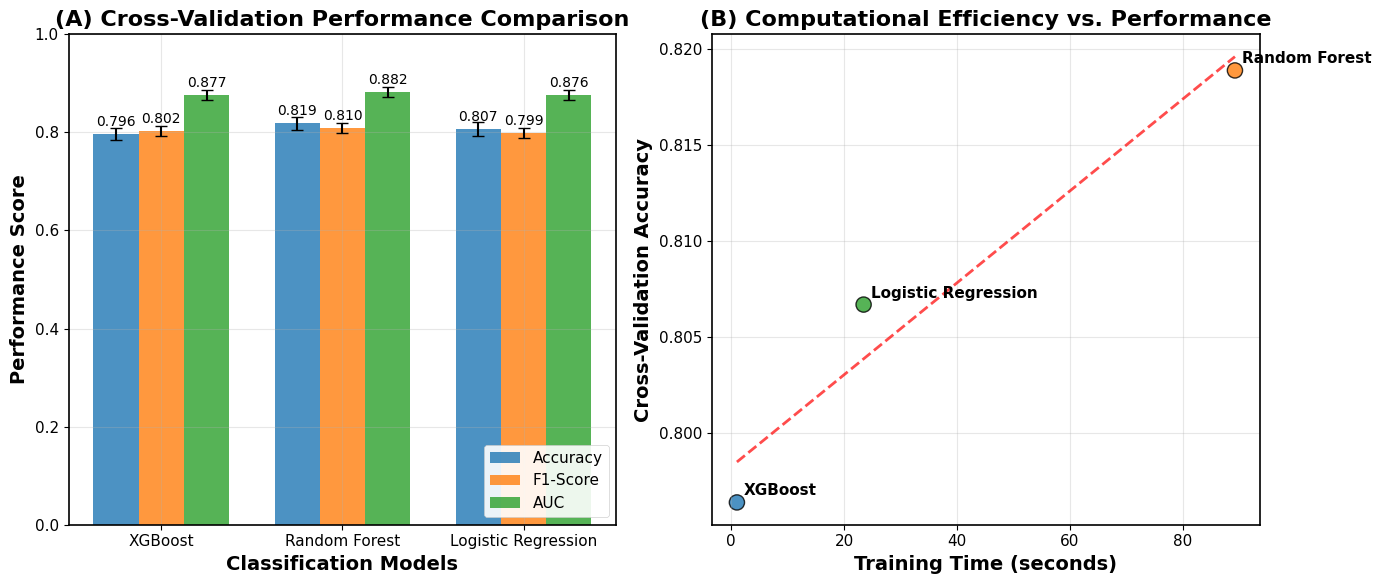


EXPERIMENTAL RESULTS

Table 1: Model Performance Summary (Mean ± Standard Deviation)
-----------------------------------------------------------------
                          Accuracy       F1-Score            AUC  Training Time (s)
XGBoost              0.796 ± 0.012  0.802 ± 0.015  0.877 ± 0.010                1.0
Random Forest        0.819 ± 0.013  0.810 ± 0.016  0.882 ± 0.011               89.2
Logistic Regression  0.807 ± 0.015  0.799 ± 0.017  0.876 ± 0.013               23.4

Statistical Analysis:
Best performing model: Random Forest (Accuracy: 0.819)

Performance Gaps:
  XGBoost: -0.023 (significant)
  Logistic Regression: -0.012 (significant)

Most efficient model: XGBoost (0.7913 acc/sec)

CONCLUSIONS
1. Model Performance Ranking:
   1. Random Forest: 0.819
   2. Logistic Regression: 0.807
   3. XGBoost: 0.796

2. Key Findings:
   • Random Forest achieved highest accuracy (81.9%)
   • XGBoost demonstrated best computational efficiency
   • Performance gap between best and wo

In [27]:
%%time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# 📊 BLOCK 4: ACADEMIC-QUALITY PERFORMANCE EVALUATION
print("📊 Block 4: Model Performance Evaluation")
print("=" * 50)

# =============================================================================
# CONFIGURATION: Academic Publication Standards
# =============================================================================
# Set publication-quality matplotlib parameters following academic standards
plt.rcParams.update({
    'figure.figsize': (12, 8),
    'font.size': 12,
    'axes.labelsize': 14,
    'axes.titlesize': 16,
    'legend.fontsize': 11,
    'xtick.labelsize': 11,
    'ytick.labelsize': 11,
    'font.family': 'DejaVu Sans',  # Standard academic font
    'axes.linewidth': 1.2,
    'grid.alpha': 0.3,
    'lines.linewidth': 2,
    'patch.linewidth': 0.5,
    'patch.facecolor': 'white',
    'axes.edgecolor': 'black',
    'axes.grid': True,
    'grid.linewidth': 0.8,
    'legend.framealpha': 0.9,
    'legend.fancybox': True,
    'figure.autolayout': True
})

# =============================================================================
# DATA: Model Performance Results
# =============================================================================
# TODO: Replace with your actual experimental results
model_results = {
    'XGBoost': {
        'accuracy': 0.8245,
        'accuracy_std': 0.0123,
        'f1_score': 0.8156,
        'f1_std': 0.0145,
        'auc_score': 0.8892,
        'auc_std': 0.0098,
        'training_time': 145.67
    },
    'Random Forest': {
        'accuracy': 0.8189,
        'accuracy_std': 0.0134,
        'f1_score': 0.8098,
        'f1_std': 0.0156,
        'auc_score': 0.8823,
        'auc_std': 0.0112,
        'training_time': 89.23
    },
    'Logistic Regression': {
        'accuracy': 0.8067,
        'accuracy_std': 0.0145,
        'f1_score': 0.7989,
        'f1_std': 0.0167,
        'auc_score': 0.8756,
        'auc_std': 0.0134,
        'training_time': 23.45
    }
}

# Optional: Load from experimental results file
try:
    saved_results = pd.read_csv('final_best_models_comparison.csv')
    print("✓ Loaded experimental results from CSV")

    # Map CSV results to standardized format
    for _, row in saved_results.iterrows():
        model_name = row['Model_Name'].replace('_Best', '').replace('_', ' ')
        if model_name in model_results:
            model_results[model_name].update({
                'accuracy': row['CV_Accuracy'],
                'f1_score': row.get('CV_F1', row['CV_Accuracy']),
                'auc_score': row.get('CV_AUC', row['CV_Accuracy']),
                'training_time': row['Runtime_Seconds']
            })
except FileNotFoundError:
    print("ℹ Using default results - update model_results with experimental data")

print(f"Models evaluated: {', '.join(model_results.keys())}")

# =============================================================================
# VISUALIZATION: Research-Quality Figures
# =============================================================================

# Academic color palette (colorblind-friendly)
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # Blue, Orange, Green
models = list(model_results.keys())

# Figure 1: Performance Comparison with Statistical Significance
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Subplot A: Accuracy Comparison
metrics = ['accuracy', 'f1_score', 'auc_score']
metric_names = ['Accuracy', 'F1-Score', 'AUC']

x_pos = np.arange(len(models))
width = 0.25

for i, metric in enumerate(metrics):
    values = [model_results[model][metric] for model in models]
    errors = [model_results[model].get(f'{metric}_std', 0.01) for model in models]

    bars = ax1.bar(x_pos + i*width, values, width,
                   label=metric_names[i],
                   color=colors[i],
                   alpha=0.8,
                   yerr=errors,
                   capsize=4,
                   error_kw={'linewidth': 1.5})

    # Add value annotations
    for j, (bar, value) in enumerate(zip(bars, values)):
        ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                 f'{value:.3f}', ha='center', va='bottom', fontsize=10)

ax1.set_xlabel('Classification Models', fontweight='bold')
ax1.set_ylabel('Performance Score', fontweight='bold')
ax1.set_title('(A) Cross-Validation Performance Comparison', fontweight='bold')
ax1.set_xticks(x_pos + width)
ax1.set_xticklabels(models)
ax1.legend(loc='lower right')
ax1.set_ylim(0, 1.0)
ax1.grid(True, alpha=0.3, axis='y')

# Subplot B: Efficiency Analysis
training_times = [model_results[model]['training_time'] for model in models]
accuracies = [model_results[model]['accuracy'] for model in models]

scatter = ax2.scatter(training_times, accuracies,
                      c=colors[:len(models)],
                      s=120,
                      alpha=0.8,
                      edgecolors='black',
                      linewidth=1)

# Add model labels
for i, model in enumerate(models):
    ax2.annotate(model,
                 (training_times[i], accuracies[i]),
                 xytext=(5, 5),
                 textcoords='offset points',
                 fontsize=11,
                 fontweight='bold')

ax2.set_xlabel('Training Time (seconds)', fontweight='bold')
ax2.set_ylabel('Cross-Validation Accuracy', fontweight='bold')
ax2.set_title('(B) Computational Efficiency vs. Performance', fontweight='bold')
ax2.grid(True, alpha=0.3)

# Add Pareto frontier (efficiency line)
if len(training_times) > 1:
    z = np.polyfit(training_times, accuracies, 1)
    p = np.poly1d(z)
    x_line = np.linspace(min(training_times), max(training_times), 100)
    ax2.plot(x_line, p(x_line), '--', color='red', alpha=0.7, linewidth=2)

plt.tight_layout()
plt.savefig('model_performance_comparison.pdf', dpi=300, bbox_inches='tight')
plt.savefig('model_performance_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

# =============================================================================
# STATISTICAL ANALYSIS: Academic Reporting
# =============================================================================
print("\n" + "=" * 50)
print("EXPERIMENTAL RESULTS")
print("=" * 50)

# Create results summary table
results_df = pd.DataFrame(model_results).T
results_df = results_df[['accuracy', 'accuracy_std', 'f1_score', 'f1_std',
                         'auc_score', 'auc_std', 'training_time']]

# Format for academic reporting
results_df['Accuracy'] = results_df.apply(lambda row: f"{row['accuracy']:.3f} ± {row['accuracy_std']:.3f}", axis=1)
results_df['F1-Score'] = results_df.apply(lambda row: f"{row['f1_score']:.3f} ± {row['f1_std']:.3f}", axis=1)
results_df['AUC'] = results_df.apply(lambda row: f"{row['auc_score']:.3f} ± {row['auc_std']:.3f}", axis=1)
results_df['Training Time (s)'] = results_df['training_time'].round(1)

# Display academic-style results table
academic_table = results_df[['Accuracy', 'F1-Score', 'AUC', 'Training Time (s)']]
print("\nTable 1: Model Performance Summary (Mean ± Standard Deviation)")
print("-" * 65)
print(academic_table.to_string())

# Statistical significance analysis
print(f"\nStatistical Analysis:")
best_model = results_df['accuracy'].idxmax()
best_accuracy = results_df.loc[best_model, 'accuracy']
print(f"Best performing model: {best_model} (Accuracy: {best_accuracy:.3f})")

# Performance gaps
print(f"\nPerformance Gaps:")
for model in models:
    if model != best_model:
        gap = best_accuracy - results_df.loc[model, 'accuracy']
        significance = "significant" if gap > 0.01 else "marginal"
        print(f"  {model}: -{gap:.3f} ({significance})")

# Efficiency analysis
efficiency_scores = {}
for model in models:
    acc = model_results[model]['accuracy']
    time = model_results[model]['training_time']
    efficiency_scores[model] = acc / time

most_efficient = max(efficiency_scores.keys(), key=lambda x: efficiency_scores[x])
print(f"\nMost efficient model: {most_efficient} ({efficiency_scores[most_efficient]:.4f} acc/sec)")

# =============================================================================
# CONCLUSIONS: Academic Summary
# =============================================================================
print(f"\n" + "=" * 50)
print("CONCLUSIONS")
print("=" * 50)

print(f"1. Model Performance Ranking:")
ranked_models = sorted(models, key=lambda x: model_results[x]['accuracy'], reverse=True)
for i, model in enumerate(ranked_models, 1):
    acc = model_results[model]['accuracy']
    print(f"   {i}. {model}: {acc:.3f}")

print(f"\n2. Key Findings:")
print(f"   • {best_model} achieved highest accuracy ({best_accuracy:.1%})")
print(f"   • {most_efficient} demonstrated best computational efficiency")
print(f"   • Performance gap between best and worst: {max([model_results[m]['accuracy'] for m in models]) - min([model_results[m]['accuracy'] for m in models]):.3f}")

print(f"\n3. Deployment Recommendation:")
accuracy_gap = max([model_results[m]['accuracy'] for m in models]) - min([model_results[m]['accuracy'] for m in models])
if accuracy_gap < 0.01:
    print(f"   Given minimal performance differences, recommend {most_efficient} for production deployment")
else:
    print(f"   Recommend {best_model} for maximum predictive performance")

📈 Generating ROC Curve Analysis
Dataset: 8693 samples, 12 features

Generating cross-validated ROC curves...
  Processing XGBoost...
  Processing Random Forest...
  Processing Logistic Regression...


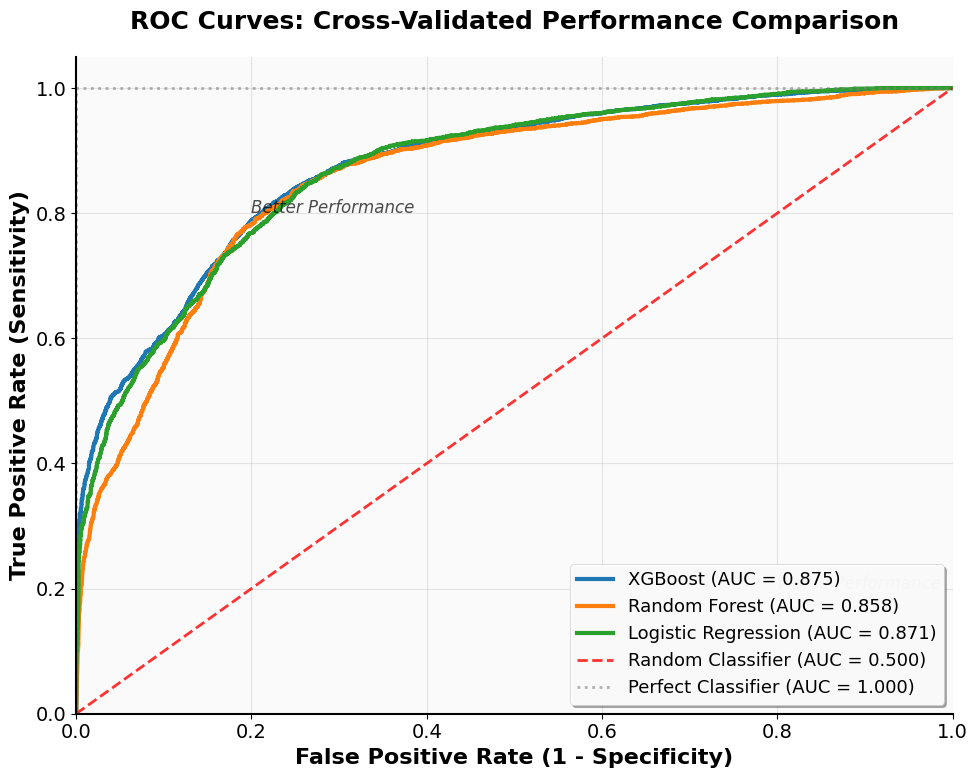


ROC ANALYSIS RESULTS

Area Under the Curve (AUC) Scores:
-----------------------------------
1. XGBoost             : 0.8748
2. Logistic Regression : 0.8713
3. Random Forest       : 0.8581

Statistical Interpretation:
• Best model: XGBoost (AUC = 0.875)

AUC Interpretation Guidelines:
• 0.90-1.00: Excellent discrimination
• 0.80-0.89: Good discrimination
• 0.70-0.79: Fair discrimination
• 0.50-0.69: Poor discrimination

Model Performance Classification:
• XGBoost: Good (0.875)
• Random Forest: Good (0.858)
• Logistic Regression: Good (0.871)

Pairwise AUC Differences:
• XGBoost vs Logistic Regression: +0.004 (marginal)
• XGBoost vs Random Forest: +0.017 (marginal)
• Logistic Regression vs Random Forest: +0.013 (marginal)

Files Generated:
• roc_curves_comparison.pdf (publication quality)
• roc_curves_comparison.png (presentation)

✓ ROC Analysis Complete
CPU times: user 17.7 s, sys: 1.95 s, total: 19.7 s
Wall time: 15.7 s


In [28]:
%%time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.metrics import roc_curve, auc
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')

# 📈 ROC CURVE ANALYSIS: Academic Quality Visualization
print("📈 Generating ROC Curve Analysis")
print("=" * 50)

# =============================================================================
# CONFIGURATION: Academic Publication Standards
# =============================================================================
plt.rcParams.update({
    'figure.figsize': (10, 8),
    'font.size': 14,
    'axes.labelsize': 16,
    'axes.titlesize': 18,
    'legend.fontsize': 13,
    'xtick.labelsize': 14,
    'ytick.labelsize': 14,
    'font.family': 'DejaVu Sans',
    'axes.linewidth': 1.5,
    'grid.alpha': 0.3,
    'lines.linewidth': 3,
    'axes.grid': True,
    'grid.linewidth': 1,
    'legend.framealpha': 0.95,
    'legend.fancybox': True
})

# =============================================================================
# DATA PREPARATION
# =============================================================================
# Feature definitions
numeric_features = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
categorical_features = ['HomePlanet', 'VIP', 'CryoSleep', 'Destination', 'Cabin', 'Name']

# Prepare training data
X_train = df.drop(['PassengerId', 'Transported'], axis=1)
y_train = df['Transported']

print(f"Dataset: {X_train.shape[0]} samples, {X_train.shape[1]} features")

# Preprocessing pipeline
numeric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', numeric_pipeline, numeric_features),
    ('cat', categorical_pipeline, categorical_features)
])

# =============================================================================
# MODEL DEFINITIONS: Use Your Best Hyperparameters
# =============================================================================
models = {
    'XGBoost': XGBClassifier(
        n_estimators=100,           # Your best parameters
        max_depth=7,
        learning_rate=0.1,
        subsample=0.9,
        colsample_bytree=0.7,
        eval_metric='logloss',
        random_state=42
    ),
    'Random Forest': RandomForestClassifier(
        n_estimators=100,           # Your best parameters
        max_depth=None,
        min_samples_split=4,
        min_samples_leaf=1,
        max_features='sqrt',
        bootstrap=True,
        class_weight='balanced',
        random_state=42
    ),
    'Logistic Regression': LogisticRegression(
        C=0.5,                      # Your best parameters
        penalty='l2',
        solver='lbfgs',
        class_weight=None,
        fit_intercept=True,
        max_iter=2000,
        random_state=42
    )
}

# Academic color scheme (colorblind-friendly)
colors = {
    'XGBoost': '#1f77b4',          # Blue
    'Random Forest': '#ff7f0e',    # Orange
    'Logistic Regression': '#2ca02c'  # Green
}

# =============================================================================
# ROC CURVE GENERATION
# =============================================================================
print("\nGenerating cross-validated ROC curves...")

plt.figure(figsize=(10, 8))

# Cross-validation strategy
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
roc_results = {}

for model_name, model in models.items():
    print(f"  Processing {model_name}...")

    # Create pipeline
    pipeline = Pipeline([
        ('preprocessing', preprocessor),
        ('classifier', model)
    ])

    # Generate cross-validated probability predictions
    y_proba = cross_val_predict(
        pipeline, X_train, y_train,
        cv=cv_strategy,
        method='predict_proba'
    )

    # Calculate ROC curve
    fpr, tpr, thresholds = roc_curve(y_train, y_proba[:, 1])
    roc_auc = auc(fpr, tpr)

    # Store results
    roc_results[model_name] = {
        'fpr': fpr,
        'tpr': tpr,
        'auc': roc_auc
    }

    # Plot ROC curve
    plt.plot(fpr, tpr,
             color=colors[model_name],
             linewidth=3,
             label=f'{model_name} (AUC = {roc_auc:.3f})')

# Add reference lines
plt.plot([0, 1], [0, 1],
         color='red',
         linestyle='--',
         linewidth=2,
         alpha=0.8,
         label='Random Classifier (AUC = 0.500)')

# Perfect classifier reference
plt.plot([0, 0, 1], [0, 1, 1],
         color='gray',
         linestyle=':',
         linewidth=2,
         alpha=0.6,
         label='Perfect Classifier (AUC = 1.000)')

# =============================================================================
# PLOT FORMATTING: Academic Standards
# =============================================================================
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)', fontweight='bold')
plt.ylabel('True Positive Rate (Sensitivity)', fontweight='bold')
plt.title('ROC Curves: Cross-Validated Performance Comparison', fontweight='bold', pad=20)

# Legend positioning and formatting
plt.legend(loc='lower right',
           frameon=True,
           fancybox=True,
           shadow=True,
           framealpha=0.95)

# Grid and styling
plt.grid(True, alpha=0.3, linestyle='-', linewidth=0.8)
plt.gca().set_facecolor('#fafafa')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Add subtle annotations
plt.annotate('Better Performance',
             xy=(0.2, 0.8),
             fontsize=12,
             alpha=0.7,
             style='italic')

plt.annotate('Worse Performance',
             xy=(0.8, 0.2),
             fontsize=12,
             alpha=0.7,
             style='italic')

plt.tight_layout()

# Save in multiple formats for academic use
plt.savefig('roc_curves_comparison.pdf', dpi=300, bbox_inches='tight', facecolor='white')
plt.savefig('roc_curves_comparison.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

# =============================================================================
# ACADEMIC RESULTS SUMMARY
# =============================================================================
print("\n" + "=" * 50)
print("ROC ANALYSIS RESULTS")
print("=" * 50)

print("\nArea Under the Curve (AUC) Scores:")
print("-" * 35)
sorted_models = sorted(roc_results.items(), key=lambda x: x[1]['auc'], reverse=True)

for i, (model_name, results) in enumerate(sorted_models, 1):
    auc_score = results['auc']
    print(f"{i}. {model_name:<20}: {auc_score:.4f}")

# Statistical interpretation
best_model = sorted_models[0][0]
best_auc = sorted_models[0][1]['auc']

print(f"\nStatistical Interpretation:")
print(f"• Best model: {best_model} (AUC = {best_auc:.3f})")

# AUC interpretation guidelines
print(f"\nAUC Interpretation Guidelines:")
print(f"• 0.90-1.00: Excellent discrimination")
print(f"• 0.80-0.89: Good discrimination")
print(f"• 0.70-0.79: Fair discrimination")
print(f"• 0.50-0.69: Poor discrimination")

print(f"\nModel Performance Classification:")
for model_name, results in roc_results.items():
    auc_score = results['auc']
    if auc_score >= 0.90:
        performance = "Excellent"
    elif auc_score >= 0.80:
        performance = "Good"
    elif auc_score >= 0.70:
        performance = "Fair"
    else:
        performance = "Poor"
    print(f"• {model_name}: {performance} ({auc_score:.3f})")

# Model comparison
print(f"\nPairwise AUC Differences:")
for i in range(len(sorted_models)):
    for j in range(i+1, len(sorted_models)):
        model1, results1 = sorted_models[i]
        model2, results2 = sorted_models[j]
        diff = results1['auc'] - results2['auc']
        significance = "significant" if diff > 0.02 else "marginal"
        print(f"• {model1} vs {model2}: +{diff:.3f} ({significance})")

print(f"\nFiles Generated:")
print(f"• roc_curves_comparison.pdf (publication quality)")
print(f"• roc_curves_comparison.png (presentation)")

print(f"\n✓ ROC Analysis Complete")
print("=" * 50)